#### ПР4 Реализация специальных алгоритмов на графах

In [ ]:
import prettytable
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

Создание функции `wpgma`, которая реализует алгоритм WPGMA для заданной матрицы расстояний.

In [223]:
def get_matrix_min_dist_edge(matrix: list[list[float]]) -> tuple[int, int, float]:
    min_dist = None
    a, b = 0, 0

    for i, row in enumerate(matrix):
        for j, it in enumerate(row):
            if it and (min_dist is None or it < min_dist):
                min_dist = it
                a, b = i, j

    return a, b, min_dist


def wpgma(
    matrix: list[list[float]],
    labels: list[str],
    clusters: list[list[int]],
    linkage_matrix: list[list[int | float]],
    next_cluster_idx: int,
) -> list[list[int | float]]:
    n = len(matrix)

    if n == 1:
        print(f"Final cluster: {labels[0]}")
        return linkage_matrix

    # Print matrix
    table = prettytable.PrettyTable([""] + labels)
    for label, row in zip(labels, matrix):
        table.add_row([label] + row)
    print(table, end="\n\n")

    # Find two nearest clusters
    a, b, dist = get_matrix_min_dist_edge(matrix)
    print(f"Merge {labels[a]} and {labels[b]}")

    # Update labels
    new_labels = [labels[i] for i in range(n) if i not in (a, b)] + [f"({labels[a]},{labels[b]})"]

    # Update clusters and linkage matrix
    linkage_matrix.append([clusters[a][0], clusters[b][0], dist / 2, len(clusters[a]) + len(clusters[b])])
    new_clusters = [clusters[i] for i in range(n) if i not in (a, b)] + [[next_cluster_idx]]
    next_cluster_idx += 1

    # Create new matrix
    new_matrix = []

    # Calculate new weights
    for i in range(n):
        if i in (a, b):
            continue

        row = []
        for j in range(n):
            if j in (a, b):
                continue
            row.append(matrix[i][j])

        new_matrix.append(row)

    # Culculate weights for new cluster
    new_row = []
    for i in range(n):
        if i in (a, b):
            continue

        dist = (matrix[a][i] + matrix[b][i]) / 2
        new_row.append(dist)

    # Add new column to matrix
    for i, row in enumerate(new_matrix):
        row.append(new_row[i])

    # Add new row to matrix
    new_row.append(0.0)
    new_matrix.append(new_row)

    return wpgma(new_matrix, new_labels, new_clusters, linkage_matrix, next_cluster_idx)

Тестирование алгоритма на графе из 5 вершин.

In [224]:
dist_matrix_1 = [
    [0.0, 17.0, 21.0, 31.0, 23.0],
    [17.0, 0.0, 30.0, 34.0, 21.0],
    [21.0, 30.0, 0.0, 28.0, 39.0],
    [31.0, 34.0, 28.0, 0.0, 43.0],
    [23.0, 21.0, 39.0, 43.0, 0.0],
]

linkage_matrix_1 = wpgma(
    matrix=dist_matrix_1,
    labels=["A", "B", "C", "D", "E"],
    clusters=[[i] for i in range(5)],
    linkage_matrix=[],
    next_cluster_idx=5,
)

+---+------+------+------+------+------+
|   |  A   |  B   |  C   |  D   |  E   |
+---+------+------+------+------+------+
| A | 0.0  | 17.0 | 21.0 | 31.0 | 23.0 |
| B | 17.0 | 0.0  | 30.0 | 34.0 | 21.0 |
| C | 21.0 | 30.0 | 0.0  | 28.0 | 39.0 |
| D | 31.0 | 34.0 | 28.0 | 0.0  | 43.0 |
| E | 23.0 | 21.0 | 39.0 | 43.0 | 0.0  |
+---+------+------+------+------+------+

Merge A and B
+-------+------+------+------+-------+
|       |  C   |  D   |  E   | (A,B) |
+-------+------+------+------+-------+
|   C   | 0.0  | 28.0 | 39.0 |  25.5 |
|   D   | 28.0 | 0.0  | 43.0 |  32.5 |
|   E   | 39.0 | 43.0 | 0.0  |  22.0 |
| (A,B) | 25.5 | 32.5 | 22.0 |  0.0  |
+-------+------+------+------+-------+

Merge E and (A,B)
+-----------+-------+-------+-----------+
|           |   C   |   D   | (E,(A,B)) |
+-----------+-------+-------+-----------+
|     C     |  0.0  |  28.0 |   32.25   |
|     D     |  28.0 |  0.0  |   37.75   |
| (E,(A,B)) | 32.25 | 37.75 |    0.0    |
+-----------+-------+-------+----

Тестирование алгоритма на графе из 10 вершин.

In [225]:
dist_matrix_2 = [
    [0.0, 5.0, 9.0, 9.0, 8.0, 7.0, 6.0, 10.0, 9.0, 8.0],
    [5.0, 0.0, 10.0, 8.0, 7.0, 6.0, 5.0, 9.0, 8.0, 7.0],
    [9.0, 10.0, 0.0, 8.0, 9.0, 10.0, 9.0, 9.0, 8.0, 7.0],
    [9.0, 8.0, 8.0, 0.0, 5.0, 6.0, 7.0, 6.0, 7.0, 6.0],
    [8.0, 7.0, 9.0, 5.0, 0.0, 5.0, 6.0, 7.0, 6.0, 5.0],
    [7.0, 6.0, 10.0, 6.0, 5.0, 0.0, 4.0, 5.0, 5.0, 4.0],
    [6.0, 5.0, 9.0, 7.0, 6.0, 4.0, 0.0, 4.0, 4.0, 3.0],
    [10.0, 9.0, 9.0, 6.0, 7.0, 5.0, 4.0, 0.0, 3.0, 4.0],
    [9.0, 8.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 0.0, 3.0],
    [8.0, 7.0, 7.0, 6.0, 5.0, 4.0, 3.0, 4.0, 3.0, 0.0],
]

linkage_matrix_2 = wpgma(
    matrix=dist_matrix_2,
    labels=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    clusters=[[i] for i in range(10)],
    linkage_matrix=[],
    next_cluster_idx=10,
)

+---+------+------+------+-----+-----+------+-----+------+-----+-----+
|   |  A   |  B   |  C   |  D  |  E  |  F   |  G  |  H   |  I  |  J  |
+---+------+------+------+-----+-----+------+-----+------+-----+-----+
| A | 0.0  | 5.0  | 9.0  | 9.0 | 8.0 | 7.0  | 6.0 | 10.0 | 9.0 | 8.0 |
| B | 5.0  | 0.0  | 10.0 | 8.0 | 7.0 | 6.0  | 5.0 | 9.0  | 8.0 | 7.0 |
| C | 9.0  | 10.0 | 0.0  | 8.0 | 9.0 | 10.0 | 9.0 | 9.0  | 8.0 | 7.0 |
| D | 9.0  | 8.0  | 8.0  | 0.0 | 5.0 | 6.0  | 7.0 | 6.0  | 7.0 | 6.0 |
| E | 8.0  | 7.0  | 9.0  | 5.0 | 0.0 | 5.0  | 6.0 | 7.0  | 6.0 | 5.0 |
| F | 7.0  | 6.0  | 10.0 | 6.0 | 5.0 | 0.0  | 4.0 | 5.0  | 5.0 | 4.0 |
| G | 6.0  | 5.0  | 9.0  | 7.0 | 6.0 | 4.0  | 0.0 | 4.0  | 4.0 | 3.0 |
| H | 10.0 | 9.0  | 9.0  | 6.0 | 7.0 | 5.0  | 4.0 | 0.0  | 3.0 | 4.0 |
| I | 9.0  | 8.0  | 8.0  | 7.0 | 6.0 | 5.0  | 4.0 | 3.0  | 0.0 | 3.0 |
| J | 8.0  | 7.0  | 7.0  | 6.0 | 5.0 | 4.0  | 3.0 | 4.0  | 3.0 | 0.0 |
+---+------+------+------+-----+-----+------+-----+------+-----+-----+

Merge

Создание функции `draw_dendrogram` для вывода дендрограммы на основе матрицы связей.

In [ ]:
def draw_dendrogram(linkage_matrix, labels):
    plt.figure(figsize=(10, 5))
    dendro = dendrogram(linkage_matrix, labels=labels, show_leaf_counts=True)

    for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
        x = 0.5 * (i[1] + i[2])
        y = d[1]
        plt.plot(x, y, 'o', c=c)
        plt.annotate(
            f"{y:.2f}",
            (x, y),
            xytext=(0, -15),
            textcoords='offset points',
            ha='center',
            fontsize=9,
            color=c,
        )

    plt.title("WPGMA Dendrogram")
    plt.xlabel("Clusters")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()


Вывод полученной дендрограммы для графа из 5 вершин.

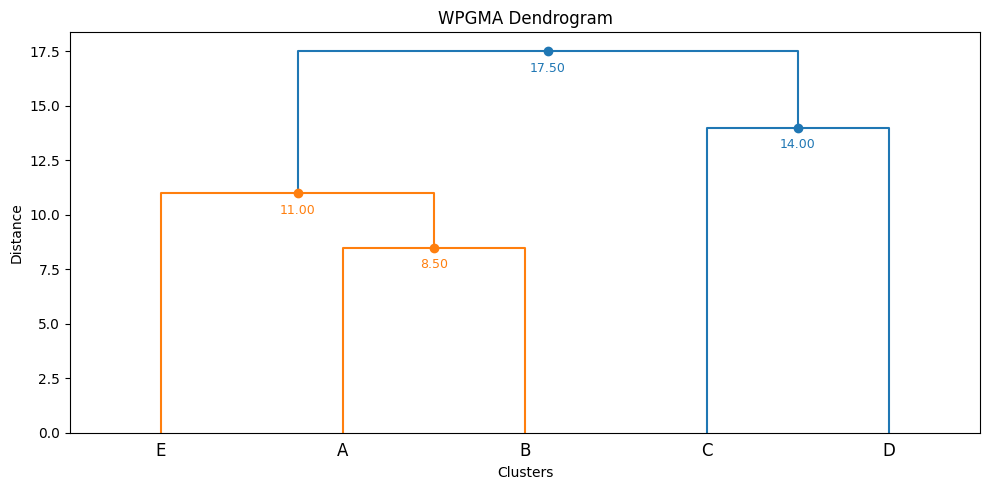

In [ ]:
draw_dendrogram(linkage_matrix_1, ["A", "B", "C", "D", "E"])

Вывод полученной дендрограммы для графа из 10 вершин.

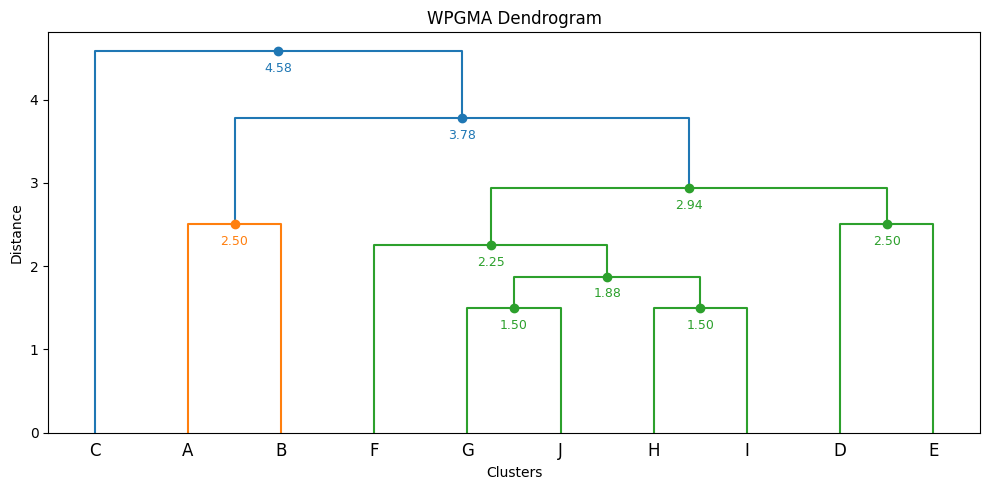

In [ ]:
draw_dendrogram(linkage_matrix_2, ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])